In [ ]:
# 다중 분류 (multiclass classifier)
# 로이터 데이터 셋 이용 

데이터 로드

In [1]:
from keras.datasets import reuters

(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

로이터 데이터셋을 텍스트로 디코딩하기

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
# 0,1,2 는 패딩,문서시작,사전에 없음 을 위한 인덱스 이므로 3을 뺀다. 
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

데이터 준비 

In [13]:
import numpy as np 
# 데이터를 인코딩합니다. 
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환 
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환 

In [15]:
#one-hot 인코딩 

def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
#one-hot 인코딩 keras 내장 함수 
from keras.utils.np_utils import to_categorical

모델 구성

In [18]:
# 46개의 클래스를 분류하기 위해 규모가 큰 층을 사용 
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) 
# 46개의 클래스로 구분하기 때문에 출력층 46 


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# loss = 
# categorical_crossentropy or sparse_categorical_crossentropy

훈련 검증


In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 274us/step - loss: 2.6708 - accuracy: 0.5174 - val_loss: 1.7735 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.4430 - accuracy: 0.7070 - val_loss: 1.3449 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.0653 - accuracy: 0.7720 - val_loss: 1.1530 - val_accuracy: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.8420 - accuracy: 0.8212 - val_loss: 1.0562 - val_accuracy: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.6722 - accuracy: 0.8603 - val_loss: 0.9687 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.5344 - accuracy: 0.8875 - val_loss: 0.9149 - val_accuracy: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.42

훈련과 검증 손실 그리기

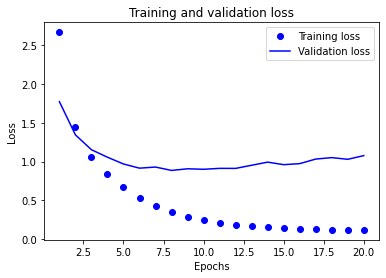

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs,loss, 'bo' , label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

결과

In [25]:
results = model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 116us/step


In [26]:
results # 약 78% 정확도 

[1.1948666400603705, 0.7787176966667175]

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0])

1.0

In [30]:
np.argmax(predictions[0])

3